In [1]:
import csv
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import datetime as dt

# nyc

In [2]:
def nyc_clean(table):

    nyc = pd.read_csv(table, parse_dates=['starttime', 'stoptime'],
                        infer_datetime_format=True)
    
    nyc['program'] = 'nyc'    
    
    return nyc

In [3]:
def nyc_add(merge_list):
    table_list = []
    for i in merge_list:
        table = nyc_clean(i)
        table_list.append(table)
    multi = pd.concat(table_list)
    
    multi.columns = [c.replace(' ', '_') for c in multi.columns]

    return multi    

In [4]:
nyc_2016_list = ['Downloads/citibike 2016/201601-citibike-tripdata.csv',
            'Downloads/citibike 2016/201602-citibike-tripdata.csv',
            'Downloads/citibike 2016/201603-citibike-tripdata.csv',
            'Downloads/citibike 2016/201604-citibike-tripdata.csv',
            'Downloads/citibike 2016/201605-citibike-tripdata.csv',
            'Downloads/citibike 2016/201606-citibike-tripdata.csv',
            'Downloads/citibike 2016/201607-citibike-tripdata.csv',
            'Downloads/citibike 2016/201608-citibike-tripdata.csv',
            'Downloads/citibike 2016/201609-citibike-tripdata.csv',
            'Downloads/citibike 2016/201610-citibike-tripdata.csv',
            'Downloads/citibike 2016/201611-citibike-tripdata.csv',
            'Downloads/citibike 2016/201612-citibike-tripdata.csv']

nyc_16 = nyc_add(nyc_2016_list)

In [663]:
def add_varib(df):
    df['dayofweek'] = df['starttime'].map(lambda x: int(x.dayofweek))
    df['hourfifteen'] = df['starttime'].apply(lambda x: int(str('{:02}'.format(x.hour))+str('{:02}'.format(15*(x.minute // 15)))))
    df['monthday'] = df['starttime'].map(lambda x: int(str('{:02}'.format(x.month))+str('{:02}'.format(x.day))))
    df['startdate'] = pd.DatetimeIndex(df.starttime).date.astype('datetime64')
    df['month'] = df['starttime'].apply(lambda x: x.strftime('%b'))
    df['hourfifteen2'] = df['starttime'].apply(lambda x: str('{:02}'.format(x.hour))+":"+str('{:02}'.format(15*(x.minute // 15))))
    
    df['age'] = df['birth_year'].apply(lambda x: round(2016.33 - x,2))
    df['age_r'] = df['birth_year'].apply(lambda x: round(2016.33 - x,0))

In [664]:
add_varib(nyc_16_n)

In [69]:
holidays_2016 = [dt.date(2016,1,1),dt.date(2016,1,18),dt.date(2016,2,15),dt.date(2016,3,25),
                 dt.date(2016,5,30),dt.date(2016,7,4),dt.date(2016,9,5),dt.date(2016,10,10),
                 dt.date(2016,11,11),dt.date(2016,11,24),dt.date(2016,11,25),dt.date(2016,12,26)]

In [ ]:
def weekday(df):
    df = df[(-df.startdate.isin(holidays_2016)) & (df.dayofweek < 5)]
    return df

In [416]:
def weekend(df):
    df = df[(df.startdate.isin(holidays_2016)) | (df.dayofweek > 4)]
    return df

In [ ]:
def workweek(df):
    df = df[(-df.startdate.isin(holidays_2016)) & (df.dayofweek < 5) & (df.hourfifteen >445)]
    
    return df

In [266]:
def workweek2(df):
    df = df[(-df.startdate.isin(holidays_2016)) & (df.dayofweek < 5)]
    
    return df

# nyc neighborhood

In [8]:
stations2 = nyc_16.groupby(['start_station_name','start_station_latitude','start_station_longitude']).size().reset_index(name="count")

In [456]:
lat_lon_list = ['{0},{1}'.format(lat, long)
                   for (lat, long) in zip(stations2.start_station_latitude, stations2.start_station_longitude)]

In [ ]:
from time import sleep

def download_json(i):
    URL = ('https://maps.googleapis.com/maps/api/geocode/json?latlng={origins}&key=hidden')
    return URL.format(origins=lat_lon_list[i])

for i in range(len(lat_lon_list)):
    url = create_url(i)
    filename = "locations_{0}.json".format(i)
    print(i)
    !curl "{url}" -o {filename}
    sleep(11)

In [6]:
def file_reads(st,ed):
    neigh = []
    for i in range(st,ed):
        empty = []
        loca = []

        word_data = csv.reader(open('location/locations_{0}.json'.format(i)))

        for j in word_data:
            empty.append(j)

        counter = 0

        for k in empty:
            counter += 1
            #         print i
            for m in k:
                if "neighborhood" in m:
    #                 print counter
                    loca.append(counter)
                    neigh_location = counter
    #     print len(loca)
        if len(loca) == 0:
            neigh.append("")
        else:
            next_p =  str(empty[loca[0] - 2])
            name = ''.join(c for c in next_p.split(":")[1] if c not in '\'\n",]')
            if (((name == ' Midtown ') or (name == ' Lower Manhattan ')) and len(loca) > 1):
                next_p =  str(empty[loca[1] - 2])
                name = ''.join(c for c in next_p.split(":")[1] if c not in '\'\n",]')
            neigh.append(name)

    return neigh

In [7]:
neigh = []
neigh.extend(file_reads(0,13))
neigh.append(" Chelsea ")
neigh.extend(file_reads(14,664))
neigh[148] = " Fort Greene "
neigh[177] = " Fort Greene "
len (neigh)

664

In [41]:
dfs = pd.DataFrame({'start_station_name' : stations2.start_station_name, 'start_neigh' : neigh})
dfe = pd.DataFrame({'end_station_name' : stations2.start_station_name, 'end_neigh' : neigh})

In [35]:
to_drop_s = []
for i in range(1,len(dfs)):
    if dfs.start_station_name[i] == dfs.start_station_name[i-1]:
        to_drop_s.append(i)
        
to_drop_e = []
for i in range(1,len(dfe)):
    if dfe.end_station_name[i] == dfe.end_station_name[i-1]:
        to_drop_e.append(i)        
        

In [42]:
dfs = dfs.drop(dfs.index[to_drop_s])
dfe = dfe.drop(dfe.index[to_drop_e])

In [46]:
nyc_16_n1 = nyc_16.merge(dfs, on='start_station_name')
nyc_16_n = nyc_16_n1.merge(dfe, on='end_station_name')
nyc_16_n.replace([" Hell\\s Kitchen "],[" Hell's Kitchen "], inplace=True)

In [ ]:
# nyc neighborhood age average

In [783]:
nyc_16_n.age.median()

36.33

In [443]:
nyc_age_neigh_totals = nyc_16_n.groupby(['start_neigh']).count().tripduration.reset_index(name='rides')
neigh_count = neigh_count[neigh_count.start_neigh!=""].sort_values('rides', ascending=False)[0:50]
neigh_count['rides'] = neigh_count['rides']/1000
neigh_count.to_csv('neigh_count.csv')

In [386]:
neigh_list = neigh_count.start_neigh.values

In [785]:
nyc_age_neigh = nyc_16_n.groupby(['start_neigh']).mean().age.reset_index(name='avg_age')
nyc_age_neigh = nyc_age_neigh[(nyc_age_neigh.start_neigh.isin(neigh_list))]
nyc_age_neigh.sort_values('avg_age', ascending=False).to_csv('nyc_age_neigh.csv')

In [ ]:
# nyc ending neighborhood 

In [448]:
nyc_neigh_neigh = nyc_16_n[nyc_16_n.start_neigh == ' Williamsburg '].groupby(['end_neigh']).count().tripduration.reset_index(name='rides')
nyc_neigh_neigh = nyc_neigh_neigh[nyc_neigh_neigh.end_neigh!=""].sort_values('rides', ascending=False)[0:10]
nyc_neigh_neigh['rides'] = nyc_neigh_neigh['rides']/1000
nyc_neigh_neigh.to_csv('nyc_neigh_neigh.csv')

In [450]:
nyc_neigh_neigh = nyc_16_n[nyc_16_n.start_neigh == ' East Village '].groupby(['end_neigh']).count().tripduration.reset_index(name='rides')
nyc_neigh_neigh = nyc_neigh_neigh[nyc_neigh_neigh.end_neigh!=""].sort_values('rides', ascending=False)[0:10]
nyc_neigh_neigh['rides'] = nyc_neigh_neigh['rides']/1000
nyc_neigh_neigh.to_csv('east_village.csv')

In [451]:
nyc_neigh_neigh = nyc_16_n[nyc_16_n.start_neigh == ' UWS '].groupby(['end_neigh']).count().tripduration.reset_index(name='rides')
nyc_neigh_neigh = nyc_neigh_neigh[nyc_neigh_neigh.end_neigh!=""].sort_values('rides', ascending=False)[0:10]
nyc_neigh_neigh['rides'] = nyc_neigh_neigh['rides']/1000
nyc_neigh_neigh.to_csv('uws.csv')

In [455]:
nyc_neigh_neigh = nyc_16_n[nyc_16_n.start_neigh == ' LIC '].groupby(['end_neigh']).count().tripduration.reset_index(name='rides')
nyc_neigh_neigh = nyc_neigh_neigh[nyc_neigh_neigh.end_neigh!=""].sort_values('rides', ascending=False)[0:10]
nyc_neigh_neigh['rides'] = nyc_neigh_neigh['rides']/1000
nyc_neigh_neigh.to_csv('lic.csv')

In [ ]:
# nyc heatmaps time of day and day of year

In [74]:
nyc_16_day_time = (nyc_16_n[(nyc_16_n.hourfifteen>445)]).groupby(["monthday","month","hourfifteen","hourfifteen2"]).size().reset_index(name="count")

In [85]:
for i in range(1,len(nyc_16_day_time)):
    if nyc_16_day_time.hourfifteen.iloc[i] == 500:
        continue
    elif (((nyc_16_day_time.hourfifteen.iloc[i] - nyc_16_day_time.hourfifteen.iloc[i-1]) != 15) and (nyc_16_day_time.hourfifteen.iloc[i] - nyc_16_day_time.hourfifteen.iloc[i-1]) != 55):
        print i

6763


In [87]:
print nyc_16_day_time.iloc[6762:6764,:]

      monthday month  hourfifteen hourfifteen2  count
6762       403   Apr          500        05:00     11
6763       403   Apr          530        05:30     10


In [ ]:
nyc_16_day_time.to_csv('nyc_16_day_time.csv')

In [183]:
nyc_16_n_ww = workweek(nyc_16_n)

In [184]:
nyc_16_n_ww.groupby(["monthday","month","hourfifteen","hourfifteen2"]).size().reset_index(name="count").to_csv('nyc_16_ww_day_time.csv')

In [461]:
nyc_16_heat = nyc_16_n_ww.groupby(["monthday","month","hourfifteen","hourfifteen2"]).size().reset_index(name="count")

In [71]:
# nyc heatmaps time of day and age

In [185]:
(nyc_16_n_ww[(nyc_16_n_ww.age_r<66)&(nyc_16_n_ww.age_r>19)]).groupby(["age_r","monthday","month"]).size().reset_index(name="count").to_csv('nyc_16_age_monthday.csv')

In [186]:
(nyc_16_n_ww[(nyc_16_n_ww.age_r<66)&(nyc_16_n_ww.age_r>19)]).groupby(["age_r","hourfifteen","hourfifteen2"]).size().reset_index(name="count").to_csv('nyc_16_age_time.csv')

# chicago

In [89]:
def chi_clean(table):
    chi = pd.read_csv(table,
                        parse_dates=['starttime', 'stoptime'],
                        infer_datetime_format=True)

    chi['program'] = 'chi'
    
    chi.replace(['Dependent'],['Subscriber'], inplace=True)
    
    return chi

In [90]:
def chi_add(merge_list):
    table_list = []
    for i in merge_list:
        table = chi_clean(i)
        table_list.append(table)
    multi = pd.concat(table_list)
    
    multi.rename(columns={            
            'from_station_id' : 'start station id',
            'from_station_name' : 'start station name',
            'to_station_id' : 'end station id',
            'to_station_name' : 'end station name',
            'birthyear' : 'birth year',
   
        }, inplace=True)
    
    multi.columns = [c.replace(' ', '_') for c in multi.columns]
    
    return multi

In [91]:
chi_2016_list = ['Downloads/chicago 2016/Divvy_Trips_2016_Q1.csv',
                 'Downloads/chicago 2016/Divvy_Trips_2016_04.csv',
                 'Downloads/chicago 2016/Divvy_Trips_2016_05.csv',
                 'Downloads/chicago 2016/Divvy_Trips_2016_06.csv',
                 'Downloads/chicago 2016/Divvy_Trips_2016_Q3.csv',
                 'Downloads/chicago 2016/Divvy_Trips_2016_Q4.csv']

chi_16 = chi_add(chi_2016_list)

In [92]:
add_varib(chi_16)

In [ ]:
# chicago heatmaps time of day and day of year

In [96]:
chi_16_day_time = (chi_16[(chi_16.hourfifteen>445)]).groupby(["monthday","month","hourfifteen","hourfifteen2"]).size().reset_index(name="count")
chi_16_day_time.to_csv('chi_16_day_time.csv')

In [187]:
chi_16_ww = workweek(chi_16)

In [188]:
chi_16_ww_day_time = chi_16_ww.groupby(["monthday","month","hourfifteen","hourfifteen2"]).size().reset_index(name="count")
chi_16_ww_day_time.to_csv('chi_16_ww_day_time.csv')

In [ ]:
# chicago heatmaps age and day of year using workweek

In [189]:
(chi_16_ww[(chi_16_ww.age_r<66)&(chi_16_ww.age_r>19)]).groupby(["age_r","monthday","month"]).size().reset_index(name="count").to_csv('chi_16_age_monthday.csv')

In [190]:
(chi_16_ww[(chi_16_ww.age_r<66)&(chi_16_ww.age_r>19)]).groupby(["age_r","hourfifteen","hourfifteen2"]).size().reset_index(name="count").to_csv('chi_16_age_time.csv')

# dc

In [115]:
def dc_clean(table):
    dc = pd.read_csv(table,
                        parse_dates=['Start date', 'End date'],
                        infer_datetime_format=True)

    dc['program'] = 'dc'
    
    dc.rename(columns={'Total duration (ms)': 'Duration (ms)',
                       'Bike #' :'Bike number',
                       'Member type' : 'Member Type',
                      'Subscription type' : 'Member Type',
                       'Subscription Type' : 'Member Type'
                      }, inplace=True)
    
    dc.replace(['Casual', 'Member', 'Registered'],['Customer','Subscriber', 'Subscriber'], inplace=True)
    
    ms_change = lambda x: x / 1000
    
    dc['Duration (ms)'] = ms_change(dc['Duration (ms)'])
    
    return dc

In [116]:
def dc_add(merge_list):
    table_list = []
    for i in merge_list:
        table = dc_clean(i)
        table_list.append(table)
    multi = pd.concat(table_list)
    
    multi.rename(columns={
            'Duration (ms)': 'tripduration',
            'Start date' : 'starttime',
            'End date' : 'stoptime',
           'Start station number' :'start station id',
           'Start station' :'start station name',
           'End station number' :'end station id',
           'End station' :'end station name',
           'Bike number' : 'bikeid',
           'Member Type' : 'usertype'   
        }, inplace=True)
    
    multi.columns = [c.replace(' ', '_') for c in multi.columns]
    
    return multi 

In [117]:
dc_2016_list = ['Downloads/dc 2016/2016-Q1-Trips-History-Data.csv',
                'Downloads/dc 2016/2016-Q2-Trips-History-Data.csv',
                'Downloads/dc 2016/2016-Q3-Trips-History-Data-1.csv',
                'Downloads/dc 2016/2016-Q3-Trips-History-Data-2.csv',
                'Downloads/dc 2016/2016-Q4-Trips-History-Data.csv']

dc_16 = dc_add(dc_2016_list)

In [ ]:
add_varib(dc_16)

In [ ]:
# dc heatmaps time of day and day of year

In [128]:
dc_16_day_time = (dc_16[(dc_16.hourfifteen>445)]).groupby(["monthday","month","hourfifteen","hourfifteen2"]).size().reset_index(name="count")
dc_16_day_time = dc_16_day_time[(dc_16_day_time.monthday != 122) & (dc_16_day_time.monthday != 127)]
dc_16_day_time.to_csv('dc_16_day_time.csv')

In [181]:
dc_16_ww = workweek(dc_16)

In [182]:
dc_16_ww_day_time = dc_16_ww.groupby(["monthday","month","hourfifteen","hourfifteen2"]).size().reset_index(name="count")
dc_16_ww_day_time = dc_16_ww_day_time[(dc_16_ww_day_time.monthday != 122) & (dc_16_ww_day_time.monthday != 127)]
dc_16_ww_day_time.to_csv('dc_16_ww_day_time.csv')

# more exploration

In [ ]:
#distribution of times during the workweek

In [ ]:
nyc_16_n_ww2 = workweek2(nyc_16_n)
chi_16_ww2 = workweek2(chi_16)
dc_16_ww2 = workweek2(dc_16)

In [270]:
dc_time = dc_16_ww2.starttime.dt.time.reset_index(name="time")
chi_time = chi_16_ww2.starttime.dt.time.reset_index(name="time")
nyc_time = nyc_16_n_ww2.starttime.dt.time.reset_index(name="time")

In [271]:
nyc_time['City'] = 'NYC'
chi_time['City'] = 'Chicago'
dc_time['City'] = 'DC'

In [272]:
pd.concat([dc_time,chi_time,nyc_time]).to_csv('all_time.csv')

In [269]:
#distribution of times on saturdays

In [358]:
# take a dataframe, extract saturdays, put sunday mornings onto saturday nights
def sat_only(df, city_str):
    sat_only = df[((df['dayofweek'] == 5) & (df['starttime'].dt.hour >=5))]
    sun_only = df[((df['dayofweek'] == 6) & (df['starttime'].dt.hour < 5))]
    
    sat_time = sat_only.starttime.map(lambda t: t.replace(year=2016, month=1, day=1)).reset_index(name="time")
    sun_time = sun_only.starttime.map(lambda t: t.replace(year=2016, month=1, day=2)).reset_index(name="time")

    sat_full = pd.concat([sat_time,sun_time])
    
    sat_full['City'] = str(city_str)
    
    return sat_full

In [363]:
pd.concat([sat_only(nyc_16_n, 'NYC'),sat_only(chi_16, 'Chicago'),sat_only(dc_16,'DC')]).to_csv('sat_all.csv')

In [367]:
def sat_late(df, city_str):
    sun_only = df[((df['dayofweek'] == 6) & (df['starttime'].dt.hour < 5))]
    sun_time = sun_only.starttime.map(lambda t: t.replace(year=2016, month=1, day=2)).reset_index(name="time")    
    sun_time['City'] = str(city_str)
    return sun_time

In [368]:
pd.concat([sat_late(nyc_16_n, 'NYC'),sat_late(chi_16, 'Chicago'),sat_late(dc_16,'DC')]).to_csv('sat_late.csv')

In [ ]:
#age

In [273]:
chi_age = chi_16.age.reset_index(name="age")
nyc_age = nyc_16_n.age.reset_index(name="age")
chi_age['City'] = 'Chicago'
nyc_age['City'] = 'NYC'
pd.concat([chi_age,nyc_age]).to_csv('nyc_chi_age.csv')

In [426]:
age_table2 = pd.DataFrame(columns=('City', 'Type', 'Value'))
age_table2.loc[0] = ['NYC','Mean',nyc_16_n.age.mean()]
age_table2.loc[1] = ['NYC', 'Median',nyc_16_n.age.median()]
age_table2.loc[2] = ['Chicago', 'Mean',chi_16.age.mean()]
age_table2.loc[3] = ['Chicago', 'Median', chi_16.age.median()]

In [420]:
age_table = pd.DataFrame(columns=('City', 'Type', 'Value'))
age_table.loc[0] = ['NYC Mean','2016',nyc_16_n.age.mean()]
age_table.loc[1] = ['NYC Median','2016',nyc_16_n.age.median()]
age_table.loc[2] = ['NYC Mean','Workweek',nyc_16_n_ww2.age.mean()]
age_table.loc[3] = ['NYC Median','Workweek',nyc_16_n_ww2.age.median()]
age_table.loc[4] = ['NYC Mean','Weekend',weekend(nyc_16_n).age.mean()]
age_table.loc[5] = ['NYC Median','Weekend',weekend(nyc_16_n).age.median()]
age_table.loc[6] = ['Chicago Mean','2016',chi_16.age.mean()]
age_table.loc[7] = ['Chicago Median','2016',chi_16.age.median()]
age_table.loc[8] = ['Chicago Mean','Workweek',chi_16_ww2.age.mean()]
age_table.loc[9] = ['Chicago Median','Workweek',chi_16_ww2.age.median()]
age_table.loc[10] = ['Chicago Mean','Weekend',weekend(chi_16).age.mean()]
age_table.loc[11] = ['Chicago Median','Weekend',weekend(chi_16).age.median()]

In [427]:
age_table2.to_csv('age_table.csv')

In [423]:
age_table

,City,Type,Value
0,NYC Mean,2016,39.047450
1,NYC Median,2016,36.750000
2,NYC Mean,Workweek,39.344550
3,NYC Median,Workweek,36.750000
4,NYC Mean,Weekend,38.033322
5,NYC Median,Weekend,34.750000
6,Chicago Mean,2016,36.273247
7,Chicago Median,2016,32.750000
8,Chicago Mean,Workweek,36.765709
9,Chicago Median,Workweek,33.750000


In [ ]:
# seaborn test
import seaborn as sns

In [781]:
heat_table = pd.pivot_table(nyc_16_heat,index=['hourfifteen2'], columns=['monthday','month'], values='count')
heat_table.sort_index(ascending=False, inplace=True)

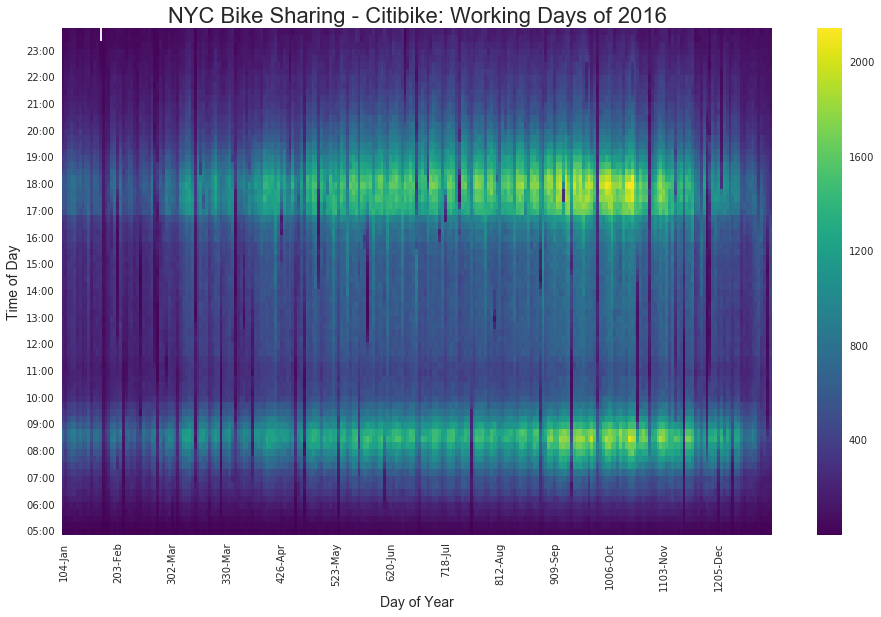

In [773]:
fig = plt.figure(figsize=(35,20))
ax = fig.add_subplot(221)
sns.heatmap(heat_table, cmap='viridis')
ax.set_xlabel('Day of Year',fontsize=14)
ax.set_ylabel('Time of Day',fontsize=14)

for label in ax.yaxis.get_ticklabels()[::]:
    label.set_visible(False)
for label in ax.yaxis.get_ticklabels()[::4]:
    label.set_visible(True)
for label in ax.xaxis.get_ticklabels()[::]:
    label.set_visible(False)
for label in ax.xaxis.get_ticklabels()[::19]:
    label.set_visible(True)

plt.title("NYC Bike Sharing - Citibike: Working Days of 2016",fontsize=22)

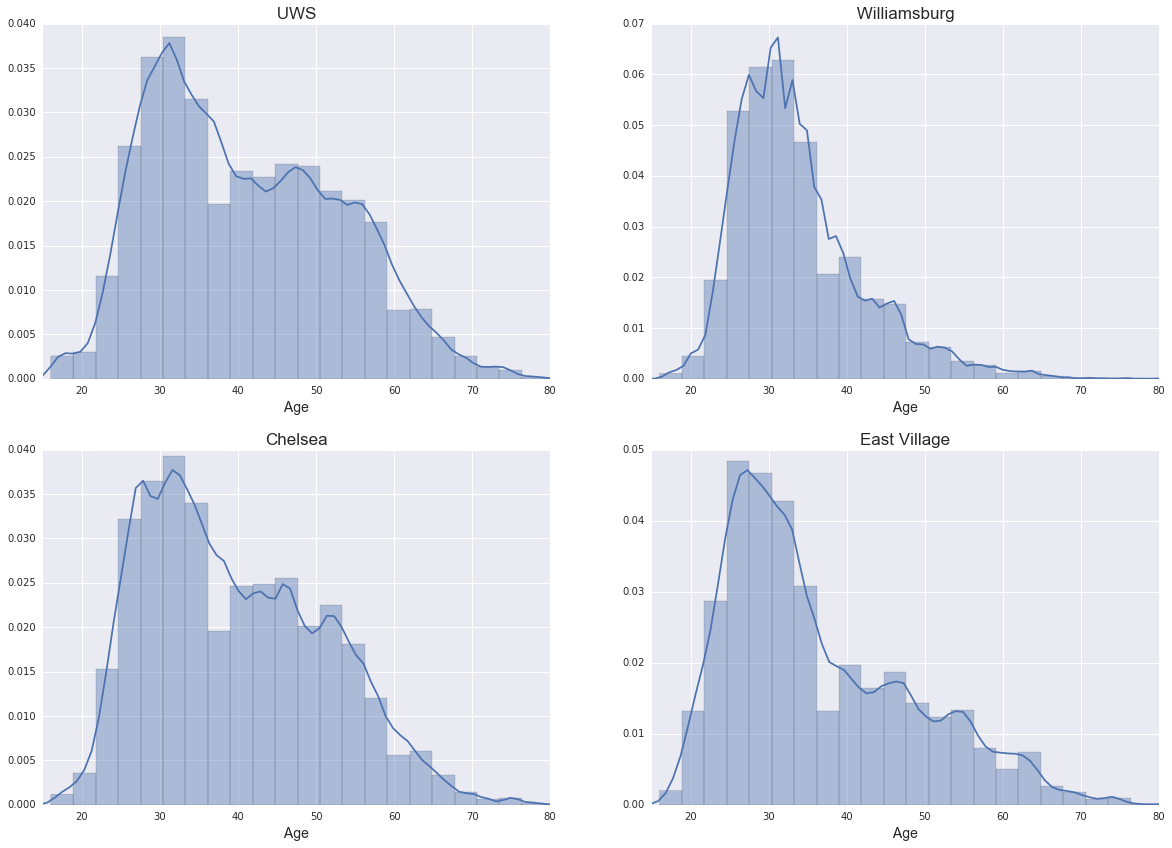

In [778]:
fig = plt.figure(figsize=(20,14))

ax1 = fig.add_subplot(221)
sns.distplot(nyc_16_n.age_r[(nyc_16_n.start_neigh == ' UWS ')&~(np.isnan(nyc_16_n.age_r))], bins=40, ax=ax1)
ax1.set_xlim(15,80)
ax1.set_title(' UWS ',fontsize=17)
ax1.set_xlabel(' Age ',fontsize=14)

ax2 = fig.add_subplot(222)
sns.distplot(nyc_16_n.age_r[(nyc_16_n.start_neigh ==' Williamsburg ')&~(np.isnan(nyc_16_n.age_r))], bins=40, ax=ax2)
ax2.set_xlim(15,80)
ax2.set_title(' Williamsburg ',fontsize=17)
ax2.set_xlabel(' Age ',fontsize=14)

ax3 = fig.add_subplot(224)
sns.distplot(nyc_16_n.age_r[(nyc_16_n.start_neigh == ' East Village ')&~(np.isnan(nyc_16_n.age_r))], bins=40, ax=ax3)
ax3.set_xlim(15,80)
ax3.set_title('East Village',fontsize=17)
ax3.set_xlabel(' Age ',fontsize=14)

ax4 = fig.add_subplot(223)
sns.distplot(nyc_16_n.age_r[(nyc_16_n.start_neigh == ' Chelsea ')&~(np.isnan(nyc_16_n.age_r))], bins=40, ax=ax4)
ax4.set_xlim(15,80)
ax4.set_title('Chelsea',fontsize=17)
ax4.set_xlabel(' Age ',fontsize=14)

plt.show()


<function matplotlib.pyplot.show>

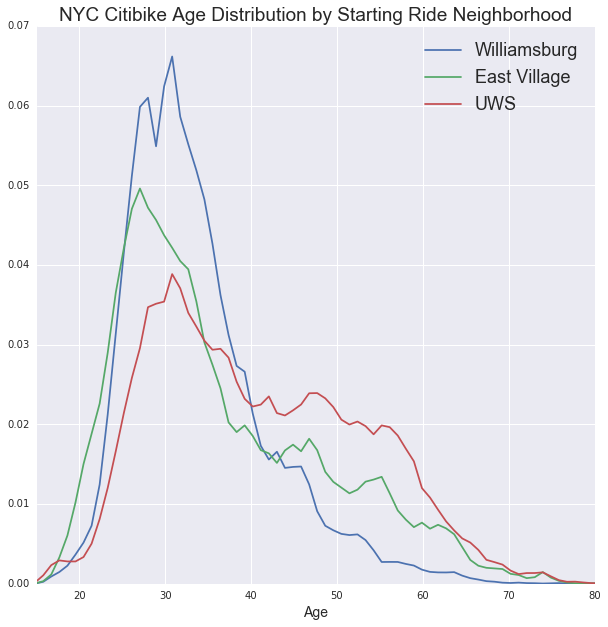

In [753]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)

sns.kdeplot(nyc_16_n.age_r[(nyc_16_n.start_neigh == ' Williamsburg ')&~(np.isnan(nyc_16_n.age_r))], bw=.7, ax=ax1, label='Williamsburg')
sns.kdeplot(nyc_16_n.age_r[(nyc_16_n.start_neigh == ' East Village ')&~(np.isnan(nyc_16_n.age_r))], bw=.7, ax=ax1, label='East Village')
sns.kdeplot(nyc_16_n.age_r[(nyc_16_n.start_neigh == ' UWS ')&~(np.isnan(nyc_16_n.age_r))], bw=.7, ax=ax1, label='UWS')

ax1.set_xlim(15,80)
ax1.set_title('NYC Citibike Age Distribution by Starting Ride Neighborhood',fontsize=19)
ax1.set_xlabel('Age',fontsize=14)
plt.legend(loc=1,prop={'size':18})
plt.show